<a href="https://colab.research.google.com/github/Tanisha999/Task_002/blob/main/lstm%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5660,2019-11-11,1778.000000,1780.000000,1767.130005,1771.650024,1771.650024,1946000
5661,2019-11-12,1774.660034,1786.219971,1771.910034,1778.000000,1778.000000,2037600
5662,2019-11-13,1773.390015,1775.000000,1747.319946,1753.109985,1753.109985,2989500
5663,2019-11-14,1751.430054,1766.589966,1749.560059,1754.599976,1754.599976,2264800


In [ ]:
df.shape

(5665, 7)

In [ ]:
NAN= [(c,df[c].isnull().mean()*100) for c in df]

In [ ]:
NAN=pd.DataFrame(NAN,columns=['Column_name', 'percentage'])
NAN

,Column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [ ]:
srt=df.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


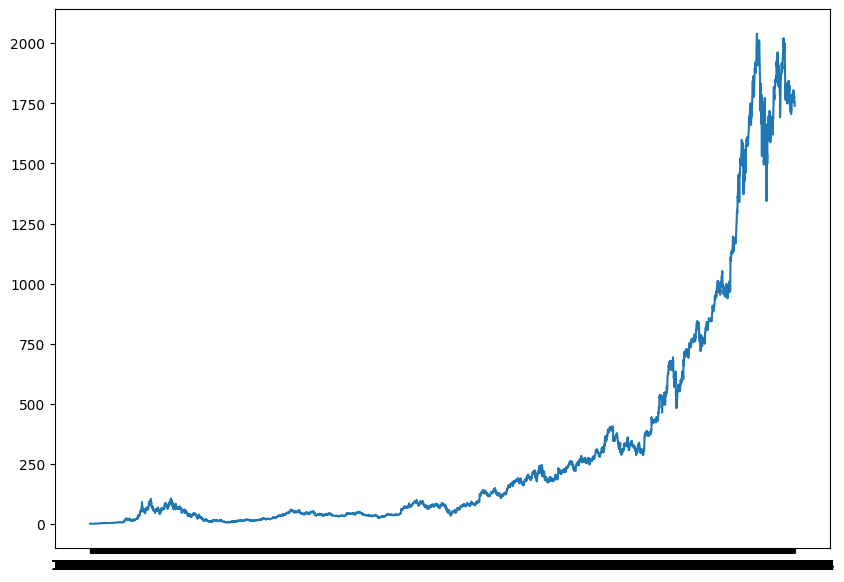

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
Close_srt=srt['Close']
Close_srt

0          1.958333
1          1.729167
2          1.708333
3          1.635417
4          1.427083
           ...     
5660    1771.650024
5661    1778.000000
5662    1753.109985
5663    1754.599976
5664    1739.489990
Name: Close, Length: 5665, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Close_srt = scaler.fit_transform(np.array(Close_srt).reshape(-1,1))
Close_srt

array([[2.75990426e-04],
       [1.63550209e-04],
       [1.53328014e-04],
       ...,
       [8.59477929e-01],
       [8.60208993e-01],
       [8.52795283e-01]])

In [ ]:
data=df.filter(['Close'])
dataset=data.values

In [ ]:
train_size = int(len(Close_srt)*0.7)
test_size = len(Close_srt) - train_size
train_data,test_data = Close_srt[0:train_size,:],Close_srt[train_size:len(Close_srt),:1]

In [ ]:
train_data.shape

(3965, 1)

In [ ]:
test_data.shape

(1700, 1)

In [ ]:
train_data=Close_srt[0:train_size,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([5.11095017e-05, 5.62205991e-05, 4.08877976e-05, 1.02221947e-05,
       7.15534005e-05, 1.27773509e-04, 1.43106310e-04, 9.19968087e-05,
       7.15534005e-05, 1.02219003e-04, 9.19968087e-05, 8.68862020e-05,
       5.36648051e-05, 5.62205991e-05, 5.62205991e-05, 6.38869998e-05,
       5.11095017e-05, 5.62205991e-05, 5.62205991e-05, 5.62205991e-05,
       4.59984043e-05, 7.15534005e-05, 5.87759024e-05, 9.45526027e-05,
       2.52991224e-04, 2.96434325e-04, 4.44651242e-04, 4.54873437e-04,
       5.72424751e-04, 4.39540635e-04, 3.62876628e-04, 5.11093545e-04,
       4.59984043e-04, 4.03763935e-04, 3.73098332e-04, 3.85875830e-04,
       3.62876628e-04, 4.39540635e-04, 4.24207834e-04, 4.08875032e-04,
       4.54873437e-04, 5.31537444e-04, 5.16204642e-04, 4.90649646e-04,
       5.00871841e-04, 4.49762339e-04, 3.98652838e-04, 4.19096736e-04,
       3.83320036e-04, 4.39540635e-04])]
[0.0004574287400190141]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3905, 50, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0,2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=1,batch_size=1, verbose=1)

3905/3905 [==============================] - 42s 10ms/step - loss: 7.8481e-05


In [ ]:
print(y_train.shape)

(3905,)


In [ ]:
np.ndindex(np.random.rand(60,60).shape)

In [ ]:
test_data = Close_srt[train_size-50: , :]
x_test=[]
y_test=dataset[train_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

53/53 [==============================] - 1s 9ms/step


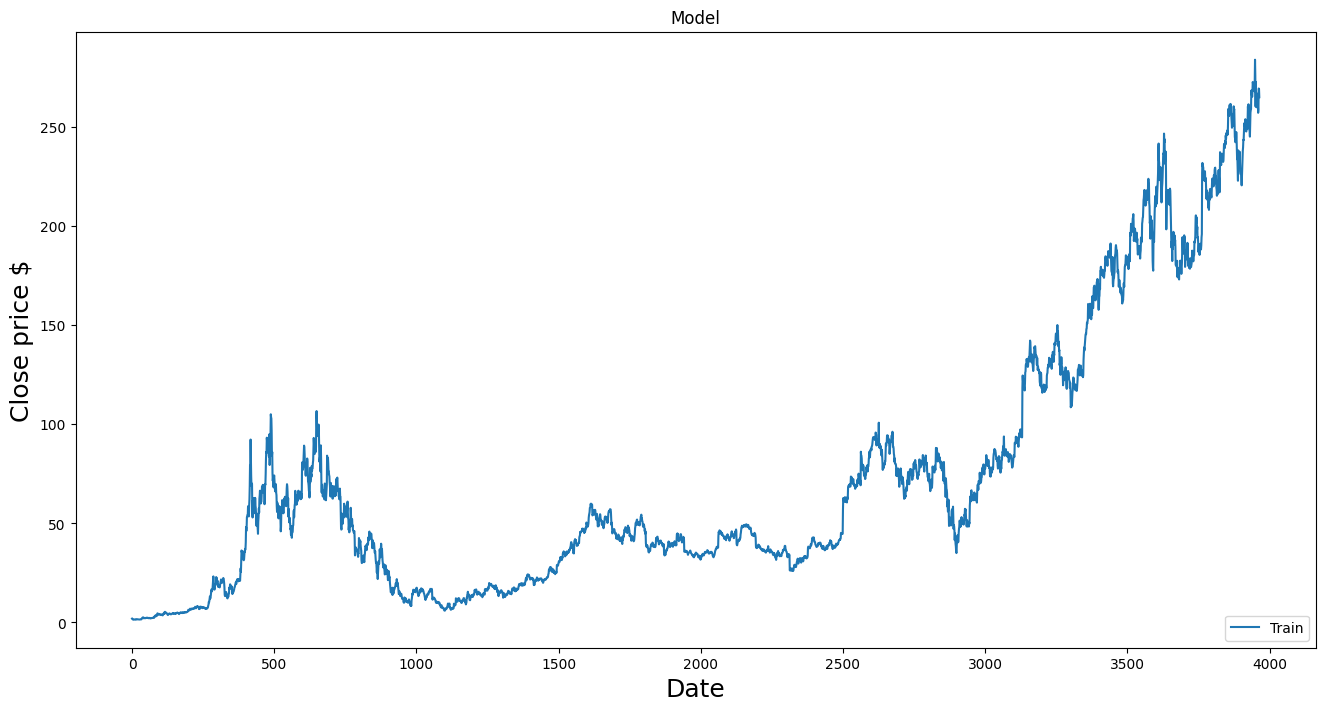

In [ ]:
train=data[:train_size]
valid=data[train_size:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()